In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

##employees vs sales -> positive correlation
##nouns vs sales -> no correlation (hypothesis: more nouns->more avenues for earnings) 


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jungwoolee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jungwoolee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jungwoolee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv("catA_train.csv")
df.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


In [3]:
df_cd = df['Company Description'][:]

nouns_per_row = []

#hypothesis: more nouns in desc suggest company does more services -> greater sales 

for text in df_cd:
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    
    #nouns
    nouns = [word for word, pos in tagged if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    nouns_per_row.append(nouns)

nouns_per_row[0]    
    
# Get the length of each sublist
lengths_per_row = [len(sublist) for sublist in nouns_per_row]
df['length_of_nouns_in_desc'] = lengths_per_row

In [4]:
print(nouns_per_row[0])
print(lengths_per_row)
print(df)

['Frank', 'Consulting', 'Services', 'Private', 'Limited', 'employment', 'services', 'employment', 'agencies', 'motion', 'picture', 'bureaus', 'Establishments', 'employers', 'employment']
[15, 14, 12, 12, 14, 6, 10, 13, 16, 14, 9, 12, 12, 11, 12, 13, 41, 55, 21, 19, 15, 13, 13, 10, 13, 26, 15, 24, 29, 11, 13, 13, 12, 15, 12, 12, 24, 2, 13, 14, 14, 13, 13, 15, 9, 4, 13, 9, 10, 6, 14, 17, 14, 12, 8, 19, 19, 12, 7, 22, 13, 12, 53, 14, 13, 12, 22, 28, 13, 13, 12, 29, 18, 13, 8, 20, 14, 15, 10, 7, 13, 15, 13, 17, 20, 19, 20, 14, 16, 16, 13, 31, 27, 23, 13, 23, 6, 14, 9, 7, 9, 11, 14, 14, 13, 19, 13, 9, 22, 15, 15, 30, 11, 12, 5, 7, 7, 17, 14, 15, 31, 21, 18, 6, 15, 10, 15, 22, 31, 18, 29, 19, 19, 14, 7, 22, 7, 16, 21, 15, 12, 22, 16, 6, 10, 24, 19, 9, 15, 21, 21, 10, 25, 14, 10, 8, 13, 23, 6, 8, 26, 18, 9, 13, 16, 15, 14, 14, 12, 12, 14, 9, 19, 12, 20, 9, 24, 8, 16, 16, 13, 26, 13, 16, 14, 4, 13, 8, 14, 14, 14, 13, 12, 13, 13, 9, 10, 9, 10, 21, 13, 29, 15, 14, 16, 13, 13, 7, 15, 22, 13, 14, 

In [5]:
df.to_csv('/Users/jungwoolee/Desktop/cat_A.csv', index = False)


In [6]:
#Sales (Global Ultimate Total USD)
#length_of_nouns_in_desc  

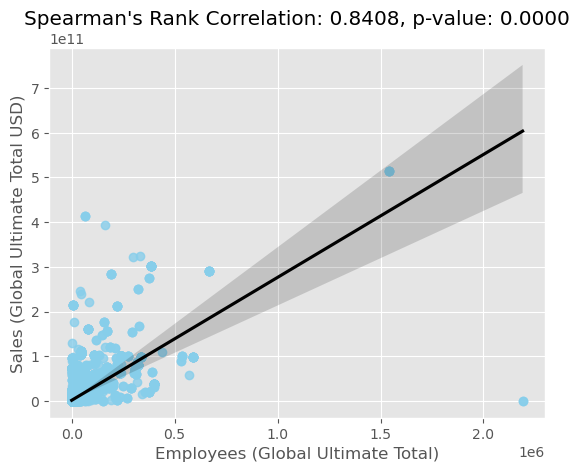

None


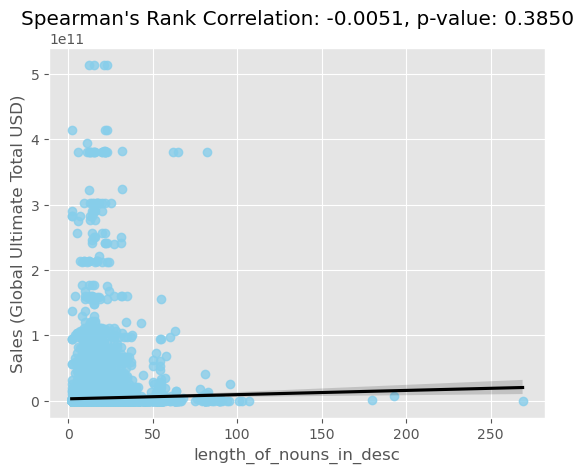

None


In [19]:
def relationship(x, y):
    x_column = x
    y_column = y

    #dropna
    df_cleaned = df[[x_column, y_column]].dropna()
    correlation_coefficient, p_value = spearmanr(df_cleaned[x_column], df_cleaned[y_column])

    sns.regplot(x=x_column, y=y_column, data=df_cleaned, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'black'})

    plt.xlabel(x)
    plt.ylabel(y)
    formatted_p_value = "{:.4f}".format(p_value)

    plt.title(f'Spearman\'s Rank Correlation: {correlation_coefficient:.4f}, p-value: {formatted_p_value}')


    plt.show()

print(relationship('Employees (Global Ultimate Total)', 'Sales (Global Ultimate Total USD)'))
print(relationship('length_of_nouns_in_desc', 'Sales (Global Ultimate Total USD)'))


#noun_counts not associated with sales -> initial hypothesis does not hold true

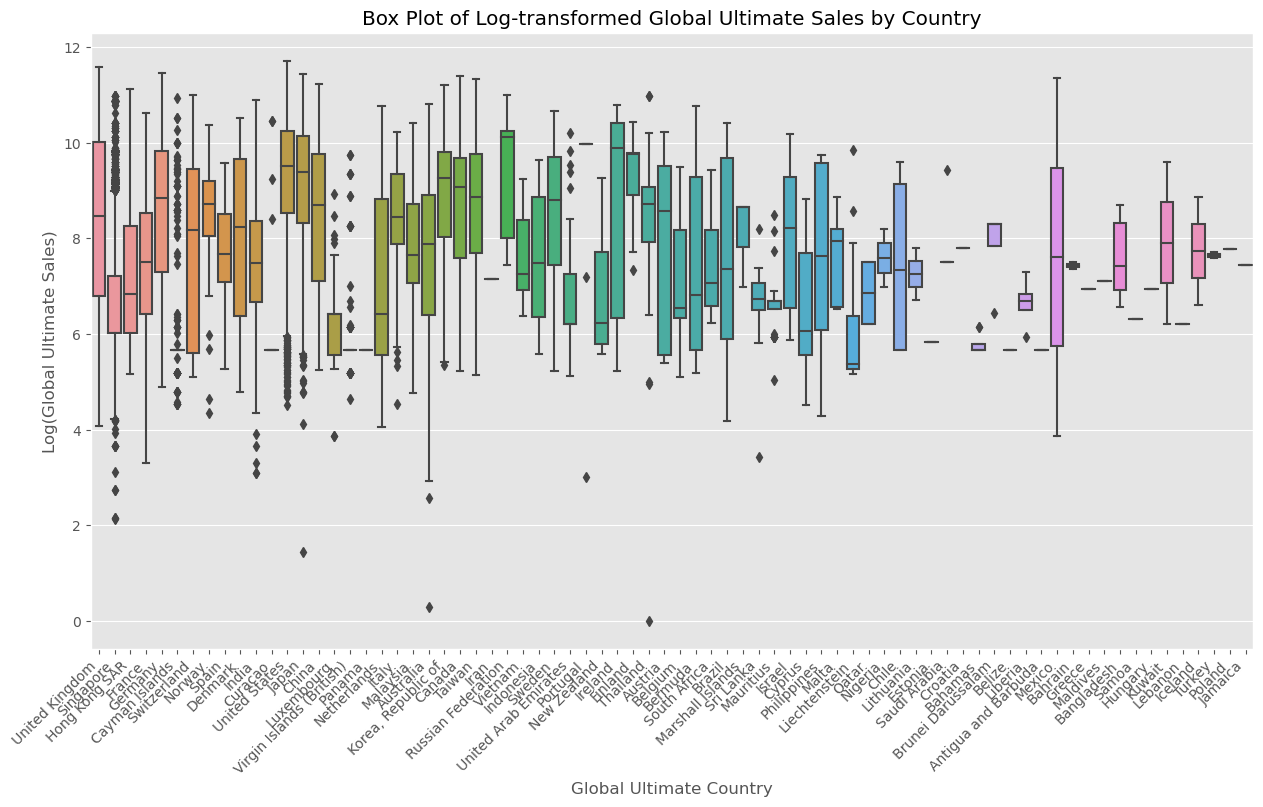

In [29]:
df['Log_Global_Ultimate_Sales'] = np.log10(df['Sales (Global Ultimate Total USD)'])

plt.figure(figsize=(15, 8))
sns.boxplot(x='Global Ultimate Country', y='Log_Global_Ultimate_Sales', data=df)
plt.xticks(rotation=45, ha='right')


plt.title('Box Plot of Global Ultimate Sales by Country')
plt.xlabel('Global Ultimate Country')
plt.ylabel('Log(Global Ultimate Sales)')

# Show the plot
plt.show()

##to get a sense of the broad global sales across countries ->med, interquartile range etc
